In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0001501364"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0001501364
SIC,6036
Description,"SAVINGS INSTITUTIONS, NOT FEDERALLY CHARTERED"
Name,"United Financial Bancorp, Inc."
Ticker,UBNK


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
interest income,31.0,4.335442e+07,1.927539e+07,18794000.0,19701000.0,48711000.0,56864000.0,73214000.0
net income,31.0,8.757355e+06,5.802571e+06,-5571000.0,4095000.0,9902000.0,13553500.0,16308000.0
net interest income,31.0,3.434335e+07,1.343912e+07,15580000.0,16970000.0,41496000.0,45312500.0,48429000.0
provision for loan losses,31.0,2.041452e+06,1.235563e+06,391000.0,777000.0,2080000.0,2660500.0,4462000.0
total revenue,20.0,5.171915e+07,4.356320e+06,43198000.0,48911500.0,51513000.0,55811000.0,57984000.0


# Plots

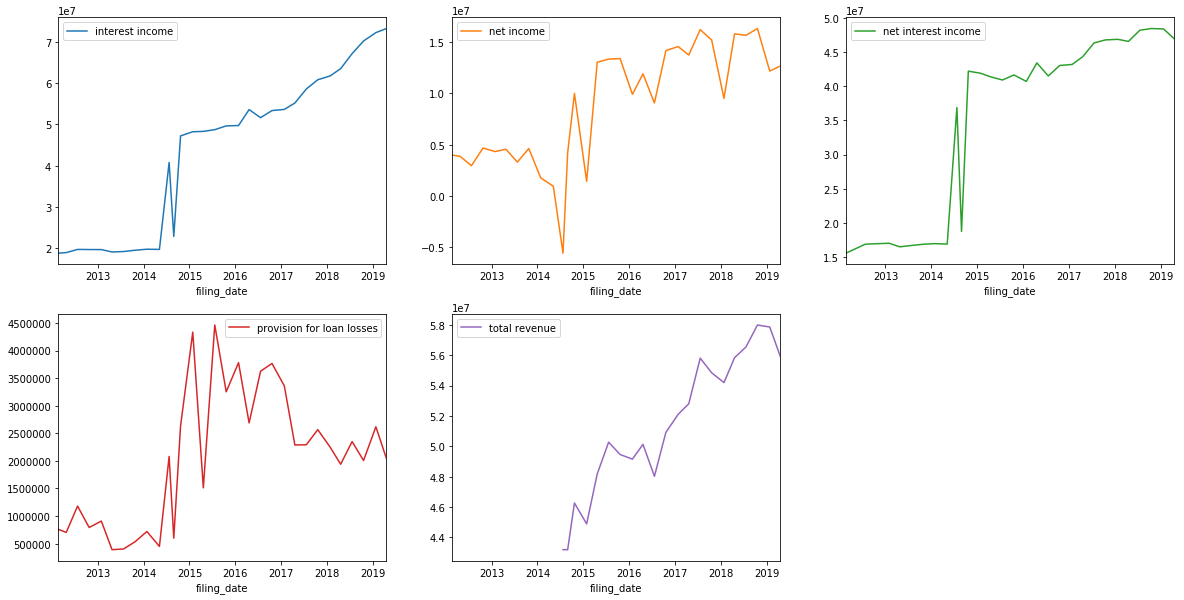

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                                 
0001501364 book value per share                               None      empty   
           net income                                       2014Q1  duplicate   
           provision for loan losses                        2014Q1  duplicate   
           total revenue              2011Q4 to 2014Q1: 10 periods    missing   

                                                 message  
cik        item                                           
0001501364 book value per share       No values for item  
           net income                   Duplicate period  
           provision for loan losses    Duplicate period  
           total revenue                  Missing period

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()